In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# Read the dataset
messages = pd.read_csv("spam.csv", encoding="latin-1")
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
messages

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
messages.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [10]:
messages.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
messages.shape

(5572, 5)

In [13]:
messages.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     I just lov this line: \Hurt me with the truth                                                                                                     I don't mind                                                                 i wil tolerat.bcs ur my someone..... But   Never comfort me with a lie\" gud ni8 and sweet dreams"    1
     When

In [14]:
messages.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [15]:
messages.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [16]:
#Checking null values
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [17]:
messages.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [18]:
messages.isnull().all()

v1            False
v2            False
Unnamed: 2    False
Unnamed: 3    False
Unnamed: 4    False
dtype: bool

In [19]:
messages=messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [20]:
messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
messages=messages.rename({'v1':'Class','v2':'Message'},axis=1)
messages.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

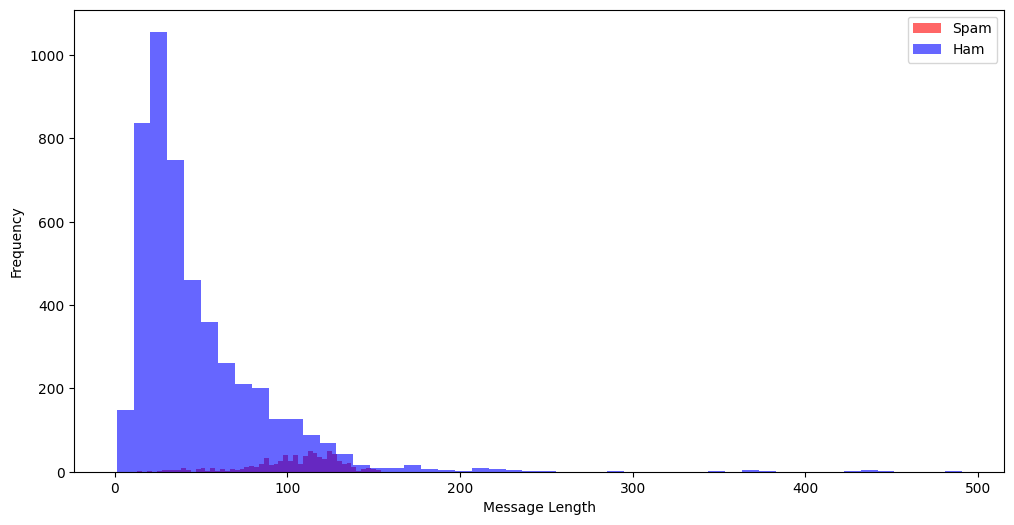

In [95]:
# Message Length Distribution by Label

import matplotlib.pyplot as plt
messages['length'] = messages['Message'].str.len()
plt.figure(figsize=(12,6))
plt.hist(messages[messages['Class'] == 'spam']['length'], bins=50, alpha=0.6, color='red', label='Spam')
plt.hist(messages[messages['Class'] == 'ham']['length'], bins=50, alpha=0.6, color='blue', label='Ham')
plt.legend()
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title

Text(0, 0.5, 'Frequency')

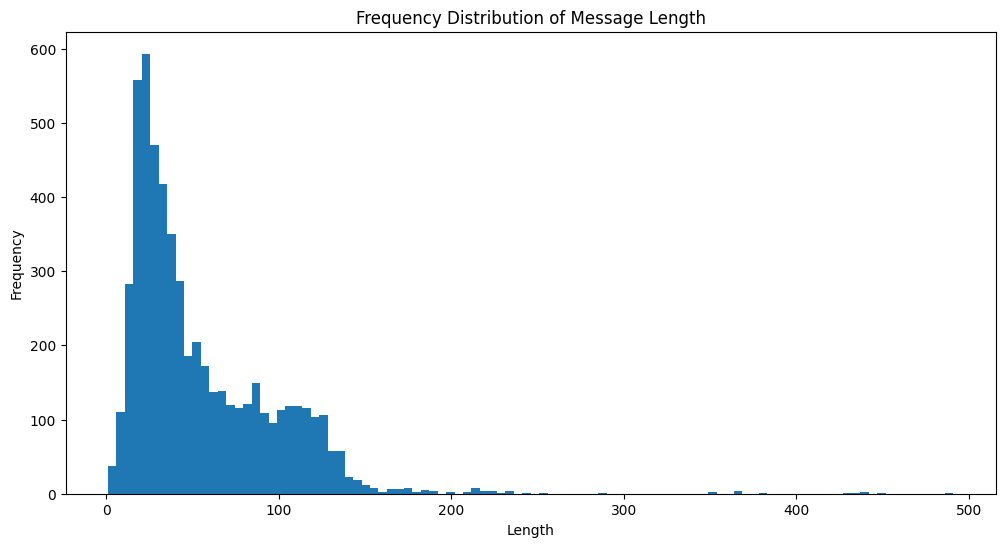

In [99]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals)
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [22]:
messages.columns

Index(['Class', 'Message'], dtype='object')

<Axes: xlabel='Class', ylabel='count'>

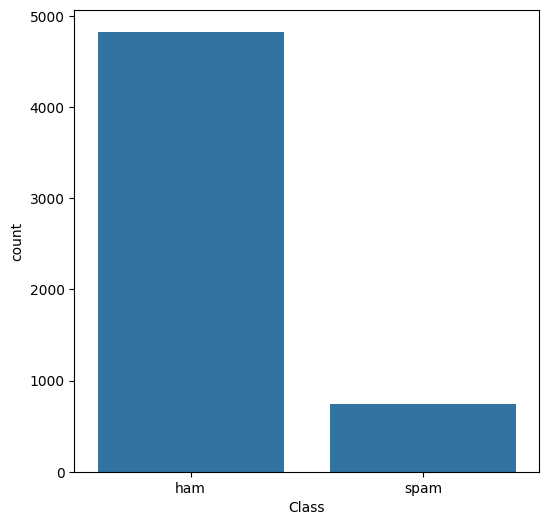

In [25]:
#DATA ANALYSIS
plt.figure(figsize=(6,6))

x= messages.Class.value_counts()
sns.countplot(x= "Class",data= messages)

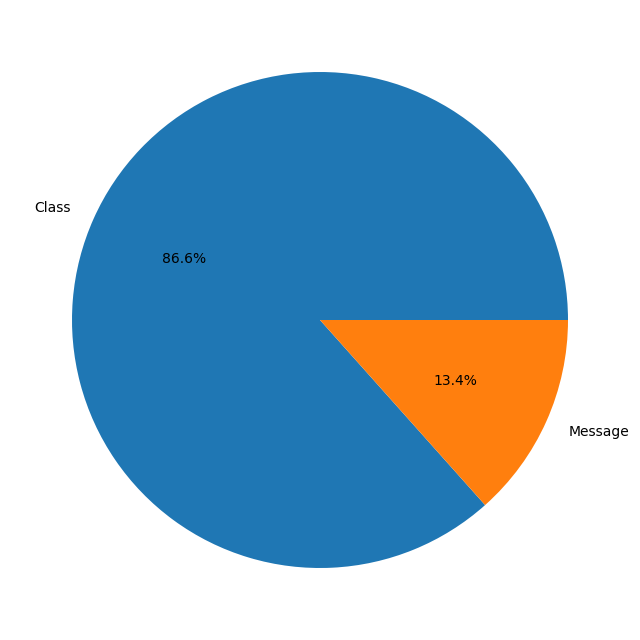

In [26]:
plt.figure(figsize=(8,12))

label= ["Class","Message"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%") # visualizing using pie
plt.show()

In [35]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
messages['Message'] = messages['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
messages.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class,Message
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


<Axes: xlabel='Class'>

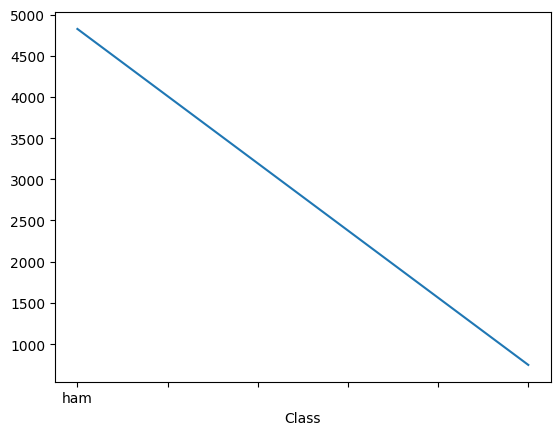

In [41]:
# @title Spam vs Ham Messages over Time

messages.groupby('Class')['Message'].count().plot(kind='line')

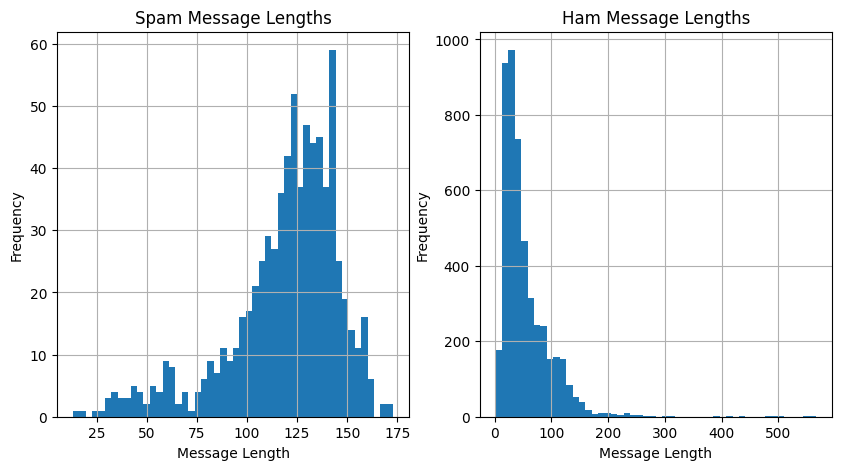

In [40]:
# @title Distribution of Message Lengths by Class

import pandas as pd
import matplotlib.pyplot as plt

spam_lengths = messages[messages['Class'] == 'spam']['Message'].str.len()
ham_lengths = messages[messages['Class'] == 'ham']['Message'].str.len()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
spam_lengths.hist(bins=50)
plt.title('Spam Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
ham_lengths.hist(bins=50)
plt.title('Ham Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [101]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop

In [103]:
spam_messages = messages[messages["Class"] == "spam"]["Message"]
ham_messages = messages[messages["Class"] == "ham"]["Message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


In [105]:
spam_words = text_preprocess(spam_messages)
# lets print some spam words
spam_words[:50]

['fre',
 'entr',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'fin',
 'tkt',
 'may',
 'text',
 'fa',
 'ceiv',
 'entr',
 'txt',
 'appl',
 'hey',
 'darl',
 'week',
 'word',
 'lik',
 'fun',
 'tb',
 'x',
 'std',
 'chg',
 'valu',
 'network',
 'custom',
 'select',
 'ce',
 'priz',
 'claim',
 'cal',
 'claim',
 'cod',
 'valid',
 'hour',
 'mobl',
 'mon',
 'u',
 'r',
 'entitl',
 'upd',
 'lat',
 'colo',
 'mobl',
 'cam',
 'cal',
 'mobl']

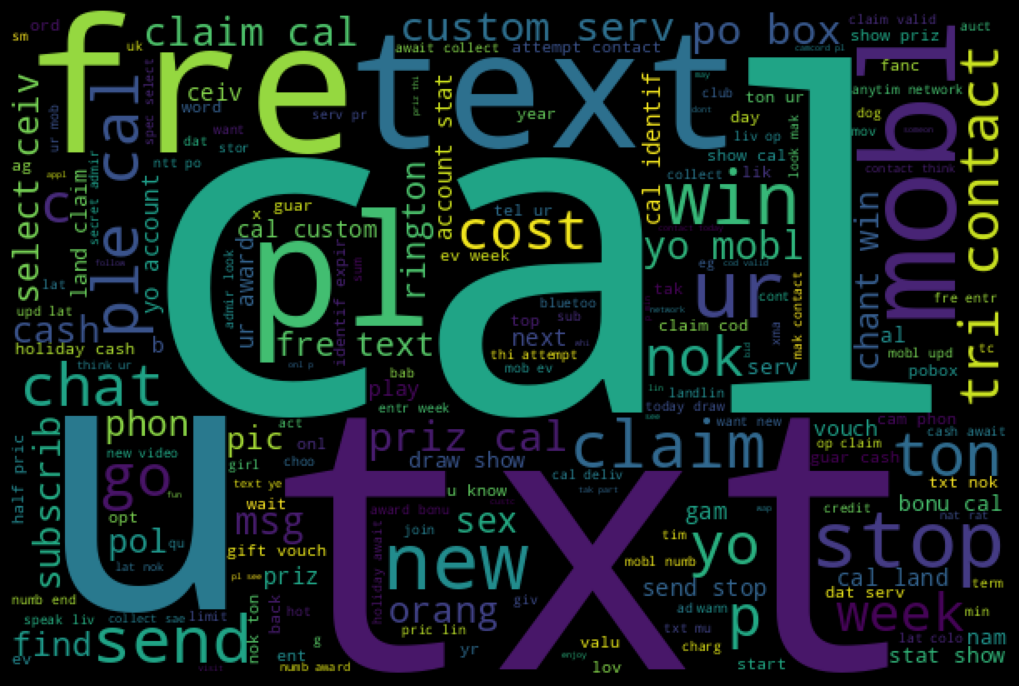

In [106]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [107]:
print("Top 50 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(50))

Top 50 Spam words are :

cal         354
txt         153
fre         146
ur          129
text        123
u           121
mobl        117
pl          116
claim       107
stop         78
new          77
get          77
nok          69
yo           68
week         65
send         64
ton          63
win          63
contact      61
priz         60
serv         59
cash         56
award        48
p            47
ple          44
phon         44
ev           44
chat         39
custom       38
ceiv         37
tri          37
numb         37
min          37
draw         37
lat          36
show         34
cost         34
c            34
collect      32
holiday      31
vouch        31
play         31
go           31
box          30
select       30
subscrib     29
guar         29
po           29
video        29
thi          28
Name: count, dtype: int64


In [108]:
ham_words = text_preprocess(ham_messages)
ham_words[:50]


['go',
 'jurong',
 'avail',
 'bug',
 'n',
 'gre',
 'world',
 'la',
 'e',
 'cin',
 'got',
 'jok',
 'wif',
 'u',
 'dun',
 'say',
 'earl',
 'u',
 'c',
 'alread',
 'think',
 'goe',
 'liv',
 'around',
 'thoughev',
 'broth',
 'lik',
 'speak',
 'tre',
 'lik',
 'aid',
 'p',
 'qu',
 'mel',
 'mel',
 'minnaminungint',
 'nurungu',
 'set',
 'callertun',
 'pre',
 'cop',
 'friend',
 'gonn',
 'hom',
 'soon',
 'want',
 'talk',
 'stuff',
 'anym',
 'cri']

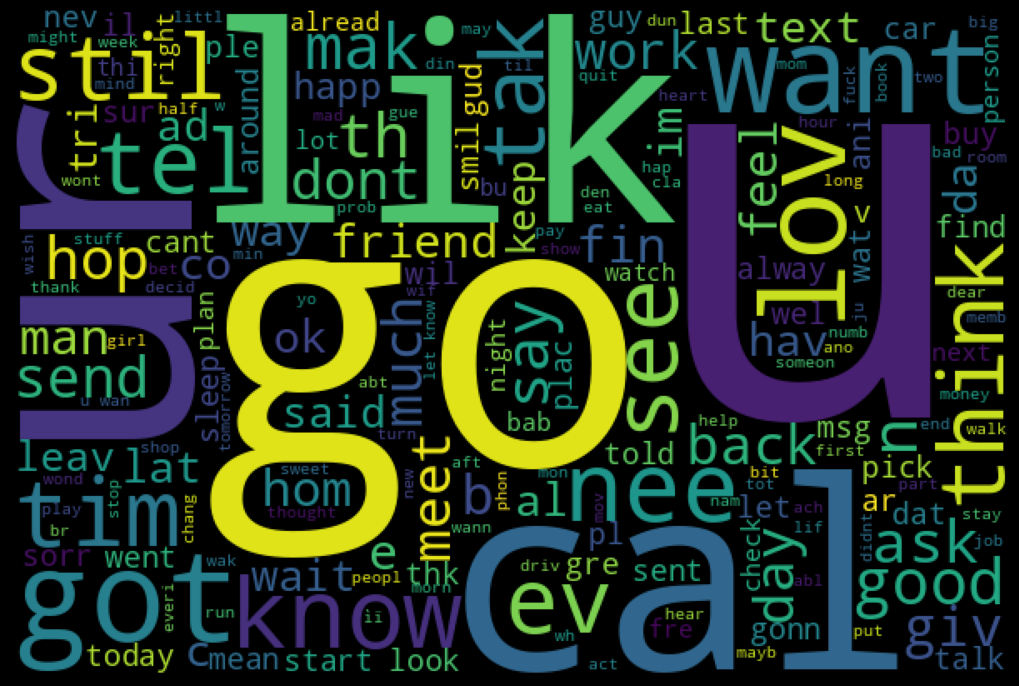

In [110]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [111]:
print("Top 50 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(50))

Top 50 Ham words are :

u         919
go        378
get       336
com       259
cal       246
ur        239
lik       232
got       216
know      210
want      195
lov       193
tim       169
nee       165
good      142
tak       139
ev        138
n         136
r         136
think     135
stil      135
mak       133
see       131
tel       128
th        123
send      120
say       118
ask       116
hop       112
hav       110
day       108
dont      103
giv       102
hom       100
meet       97
b          94
back       93
pl         91
lat        90
much       88
work       87
happ       87
let        86
feel       84
man        83
wait       81
fin        81
friend     80
pick       79
e          79
car        79
Name: count, dtype: int64


In [45]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

In [46]:
messages['clean_text'] = messages['Message'].apply(clean_text)
messages.head()

,Class,Message,clean_text
0,ham,"Go jurong point, crazy.. Available bugis n gre...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say early hor... U c already say...,u dun say early hor u c already say
4,ham,"Nah I think goes usf, lives around though",nah think goes usf lives around though


In [112]:
# remove rarewords and print the rare words

# Find the rare words
rare_words = messages['Message'].value_counts()[messages['Message'].value_counts() < 2].index.tolist()

# Remove the rare words
messages = messages[~messages['Message'].isin(rare_words)]

# Print the rare words
print(rare_words)

['our rid eq ev - man pesk cyc around tim night ;).', 'doe c tim help clear car', 'hav lov night wak see message, hop smil know be. hav gre morn', 'it issu right now. il fix tomorrow.', 'yes.mum lookin strong:)', 'ard 4 lor.', 'you right. meanwhil how project twin comin', 'hi, wlcome back, wond got eat lion something, noth much', 'whi com peopl', 'i hot n horn wil i liv loc - text pl hear strt back 150p p msg netcollex ltdhelpdesk: 02085076972 pl stop end', 'lov it! the girl off may wond smil sore.', 'wh cal me.', "i'v sent wif text. aft buy she'll tel do. so lax. we go get wkend.", 'if were/ar fre give. otherw nall ad entey nattil kitt', 'sir goodmorning, ont fre cal me.', 'someon u know ask dat serv 2 contact you! cant gue who? cal 09058095107 now vealed. pobox 7, s3xi 150p', 'i sent mag money yesterday oh.', 'great! so attract brothas?', 'ok im sur tim fin tomorrow wann spend ev co would vew vew lubly! lov x', 'we hop get away 7, langport. you stil town tonight?', 'how much would co

In [88]:
# porter stemmer

from nltk.stem import PorterStemmer
ps = PorterStemmer()
messages['Message'] = messages['Message'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(messages['Message'])

0       go jurong point, crazy.. avail bug n gre world...
1                                  ok lar. jok wif u oni.
2       fre entr 2 wkli comp win fa cup fin tkt 21st m...
3                     u dun say earl hor. u c alread say.
4                  nah i think goe usf, liv around though
                              ...                        
5567    thi 2nd tim tri 2 contact u. u å£750 pound pri...
5568                        wil ì_ b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    the guy bitch i act lik i'd inter buy some el ...
5571                                     rofl. it tru nam
Name: Message, Length: 5572, dtype: object


In [50]:
# snowball stemming

from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

messages['Message'] = messages['Message'].apply(lambda x: ' '.join([snowball_stemmer.stem(word) for word in x.split()]))

print(messages['Message'])


0       go jurong point, crazy.. avail bugi n great wo...
1                             ok lar... joke wif u oni...
2       free entri 2 wkli comp win fa cup final tkts 2...
3               u dun say earli hor... u c alreadi say...
4                 nah i think goe usf, live around though
                              ...                        
5567    this 2nd time tri 2 contact u. u å£750 pound p...
5568                       will ì_ b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    the guy bitch i act like i'd interest buy some...
5571                                   rofl. it true name
Name: Message, Length: 5572, dtype: object


In [52]:
# lancaster stemming

from nltk.stem import LancasterStemmer

ls = LancasterStemmer()
messages['Message'] = messages['Message'].apply(lambda x: ' '.join([ls.stem(word) for word in x.split()]))
print(messages['Message'])

0       go jurong point, crazy.. avail bug n gre world...
1                              ok lar... jok wif u oni...
2       fre entr 2 wkli comp win fa cup fin tkt 21st m...
3                 u dun say earl hor... u c alread say...
4                  nah i think goe usf, liv around though
                              ...                        
5567    thi 2nd tim tri 2 contact u. u å£750 pound pri...
5568                        wil ì_ b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    the guy bitch i act lik i'd interest buy some ...
5571                                     rofl. it tru nam
Name: Message, Length: 5572, dtype: object


In [53]:
# Regexp stemming

import re
def regexp_stemmer(text):
    """
    Stems the input text using regular expressions.

    Args:
        text (str): The text to stem.

    Returns:
        str: The stemmed text.
    """

    # Remove common prefixes
    text = re.sub(r'^un', '', text)
    text = re.sub(r'^re', '', text)
    text = re.sub(r'^dis', '', text)
    text = re.sub(r'^mis', '', text)

    # Remove common suffixes
    text = re.sub(r'sses$', 'ss', text)
    text = re.sub(r'ies$', 'i', text)
    text = re.sub(r'ss$', 'ss', text)
    text = re.sub(r's$', '', text)
    text = re.sub(r'eed$', 'ee', text)
    text = re.sub(r'ed$', '', text)
    text = re.sub(r'ing$', '', text)
    text = re.sub(r'ous$', 'ous', text)
    text = re.sub(r'ive$', '', text)
    text = re.sub(r'ful$', '', text)
    text = re.sub(r'able$', '', text)
    text = re.sub(r'ment$', '', text)
    text = re.sub(r'tion$', 'tion', text)
    text = re.sub(r'sion$', 'sion', text)
    text = re.sub(r'ism$', '', text)
    text = re.sub(r'er$', '', text)
    text = re.sub(r'est$', '', text)

    # Handle special cases
    text = re.sub(r'(.)\1{2}$', r'\1', text)
    text = re.sub(r'(.)\1{3}$', r'\1\1', text)

    return text

messages['Message'] = messages['Message'].apply(lambda x: ' '.join([regexp_stemmer(word) for word in x.split()]))
print(messages['Message'])


0       go jurong point, crazy.. avail bug n gre world...
1                                  ok lar. jok wif u oni.
2       fre entr 2 wkli comp win fa cup fin tkt 21st m...
3                     u dun say earl hor. u c alread say.
4                  nah i think goe usf, liv around though
                              ...                        
5567    thi 2nd tim tri 2 contact u. u å£750 pound pri...
5568                        wil ì_ b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    the guy bitch i act lik i'd inter buy some el ...
5571                                     rofl. it tru nam
Name: Message, Length: 5572, dtype: object


In [54]:
# Lemmatization using WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

messages['Message'] = messages['Message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

print(messages['Message'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


0       go jurong point, crazy.. avail bug n gre world...
1                                  ok lar. jok wif u oni.
2       fre entr 2 wkli comp win fa cup fin tkt 21st m...
3                     u dun say earl hor. u c alread say.
4                  nah i think goe usf, liv around though
                              ...                        
5567    thi 2nd tim tri 2 contact u. u å£750 pound pri...
5568                        wil ì_ b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    the guy bitch i act lik i'd inter buy some el ...
5571                                     rofl. it tru nam
Name: Message, Length: 5572, dtype: object


In [48]:
X = messages['clean_text']
y = messages['Class']

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [60]:
# to verify that function is working
messages['Message'].head(5).apply(message_text_process)

0    [go, jurong, point, crazy, avail, bug, n, gre,...
1                          [ok, lar, jok, wif, u, oni]
2    [fre, entr, 2, wkli, comp, win, fa, cup, fin, ...
3          [u, dun, say, earl, hor, u, c, alread, say]
4          [nah, think, goe, usf, liv, around, though]
Name: Message, dtype: object

In [64]:
# start text processing with vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# bag of words by applying the function and fit the data(message) into it
bag_of_words_transformer=CountVectorizer(analyzer=message_text_process).fit(messages['Message'])
# print the length of bag of words stored in vocabulary_attribute
print(len(bag_of_words_transformer.vocabulary_))

8286


In [66]:
#store bag of words for messages using transform method
message_bagofwords=bag_of_words_transformer.transform(messages['Message'])
#apply tfidf transformer and fit the bag of words into it(transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)

In [67]:
#print shape of tfidf
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 8286)


In [69]:
# choose naive bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,messages['Class'])

In [70]:
# check model for prediction and expected value say for message#2 and message#5
message=messages['Message'][4]
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])

#print('expected',data.response[4])


predicted ham


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [72]:
message=messages['Message'][4]
# check model for prediction and expected value say for message#2 and message#5
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])
#print('expected',data.label[4])

predicted ham


In [79]:
#importing PCA for the dimensionality reduction
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
!pip install scikit-plot
import scikitplot as skplt

In [80]:
#function for the model building and prediction
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)




    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(8,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)


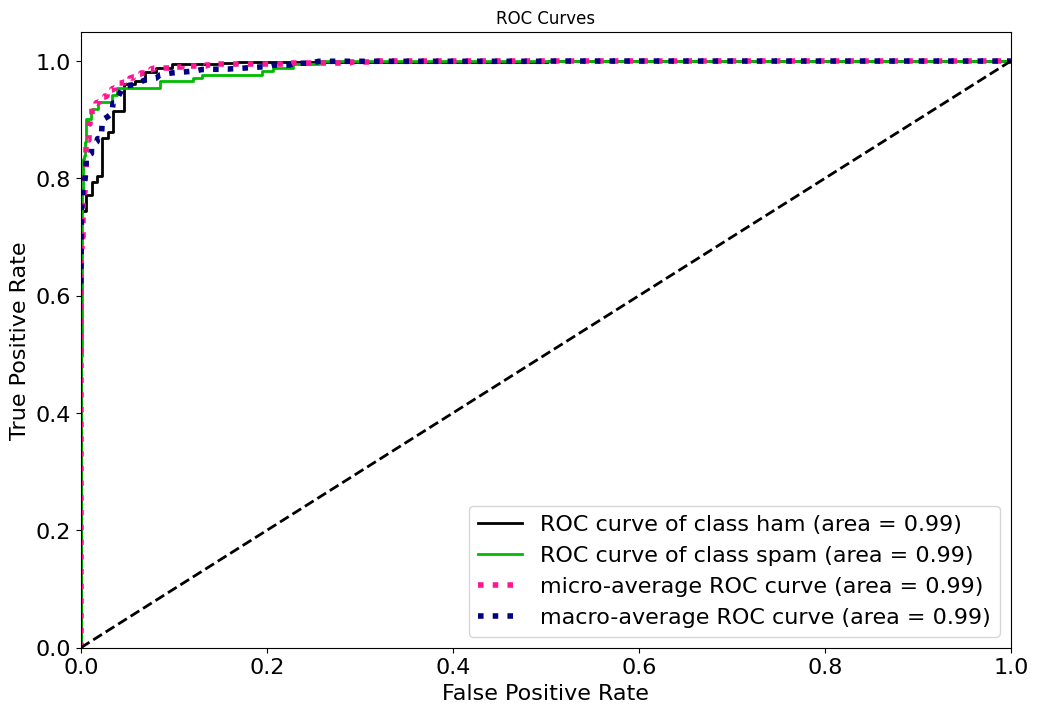

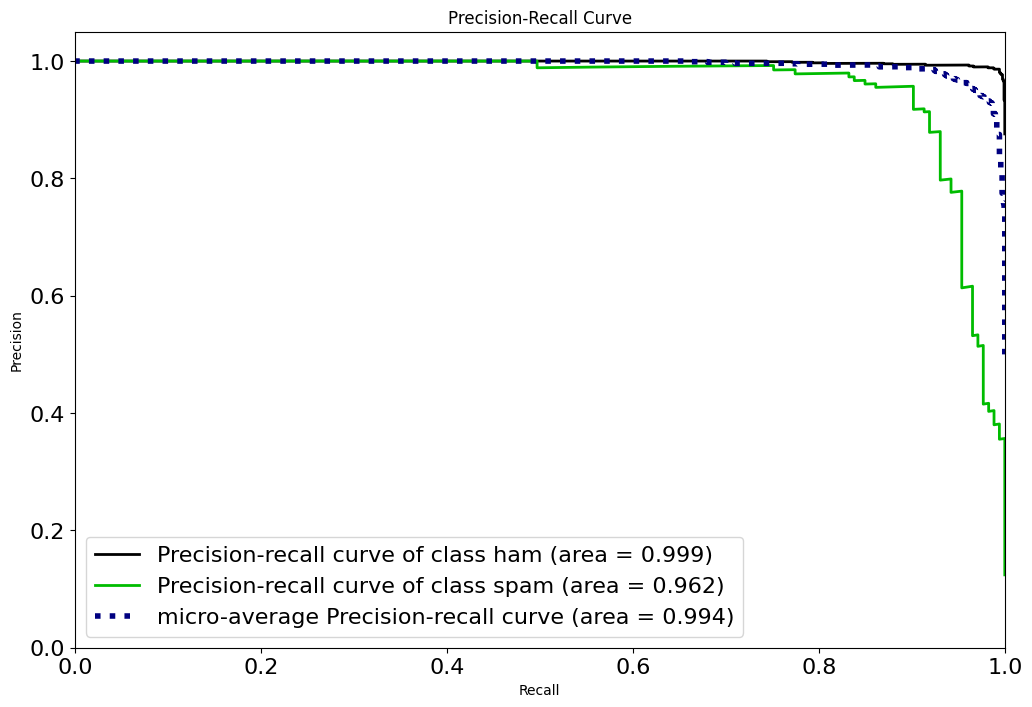

Confusion Matrix:
 [[1219    1]
 [  52  121]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       0.99      0.70      0.82       173

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.19526202440775
Training Score:
 97.00885379277338


In [81]:
#1.LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)

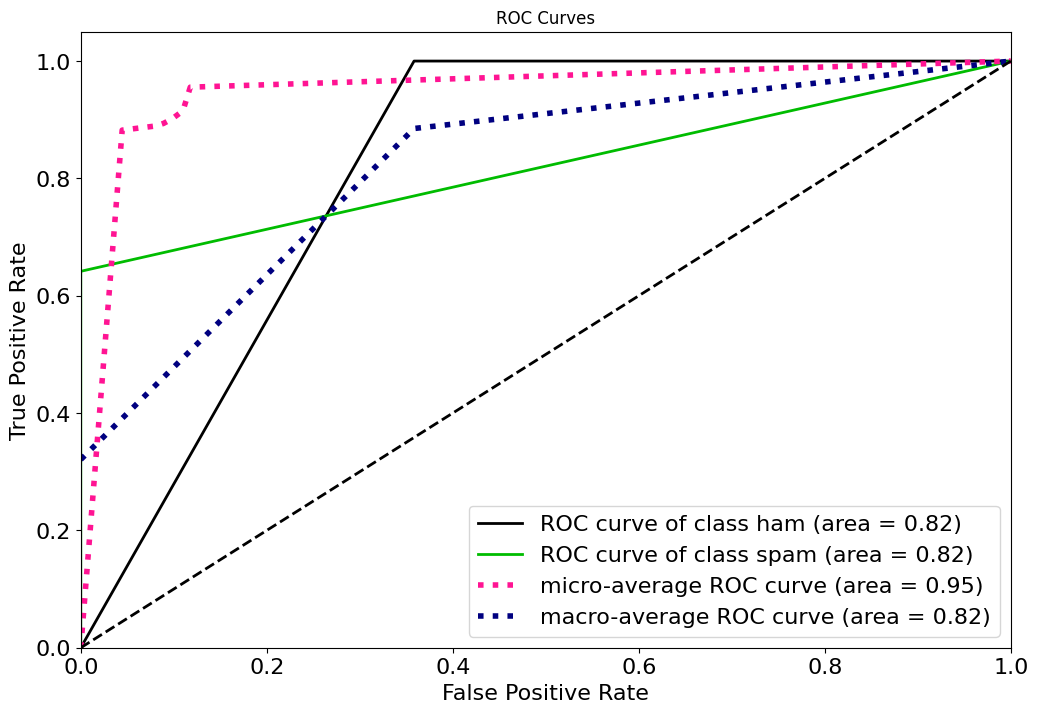

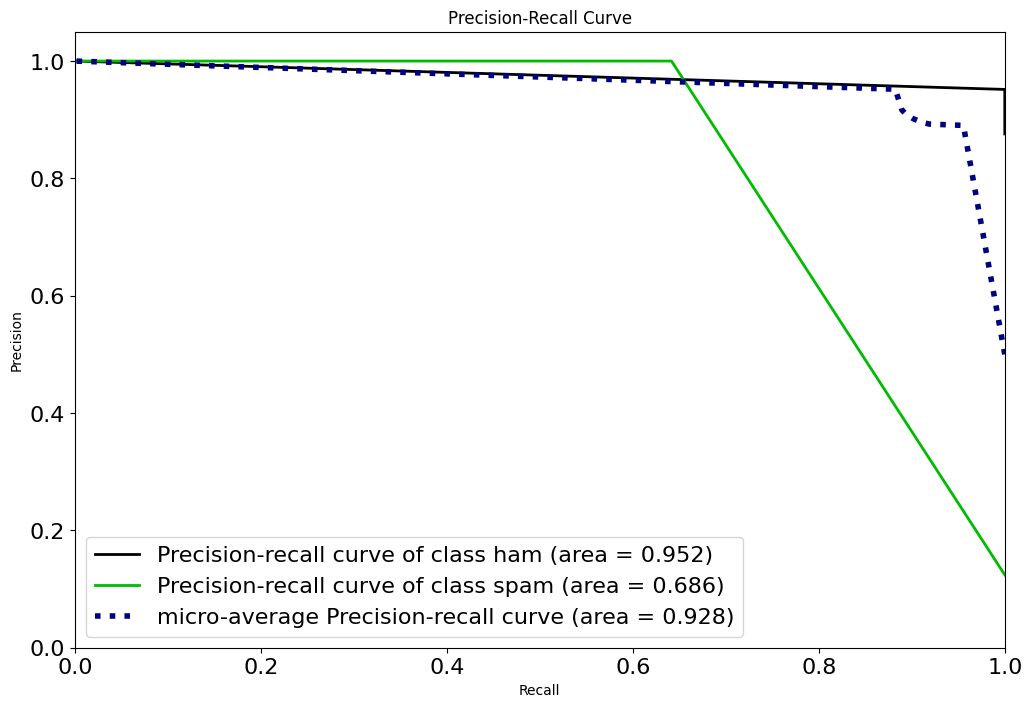

Confusion Matrix:
 [[1220    0]
 [ 137   36]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1220
        spam       1.00      0.21      0.34       173

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.65      1393
weighted avg       0.91      0.90      0.87      1393

Accuracy: 90.1651112706389
Training Score:
 90.45226130653266


In [82]:
#K NEIGHBORS CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
Model(model,X,y)

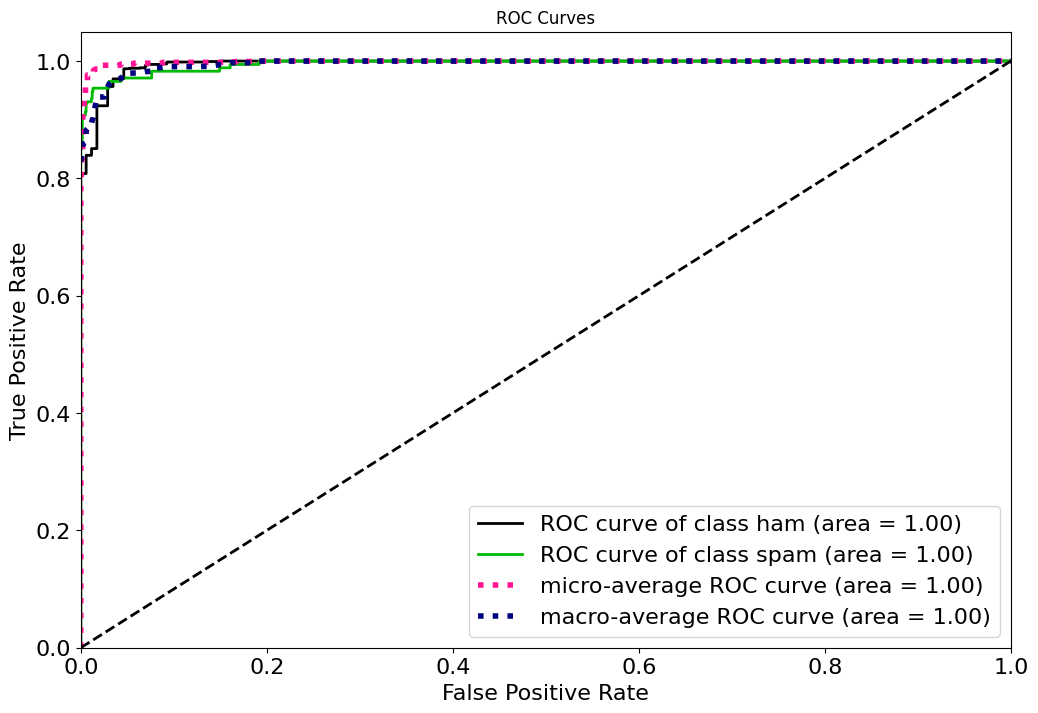

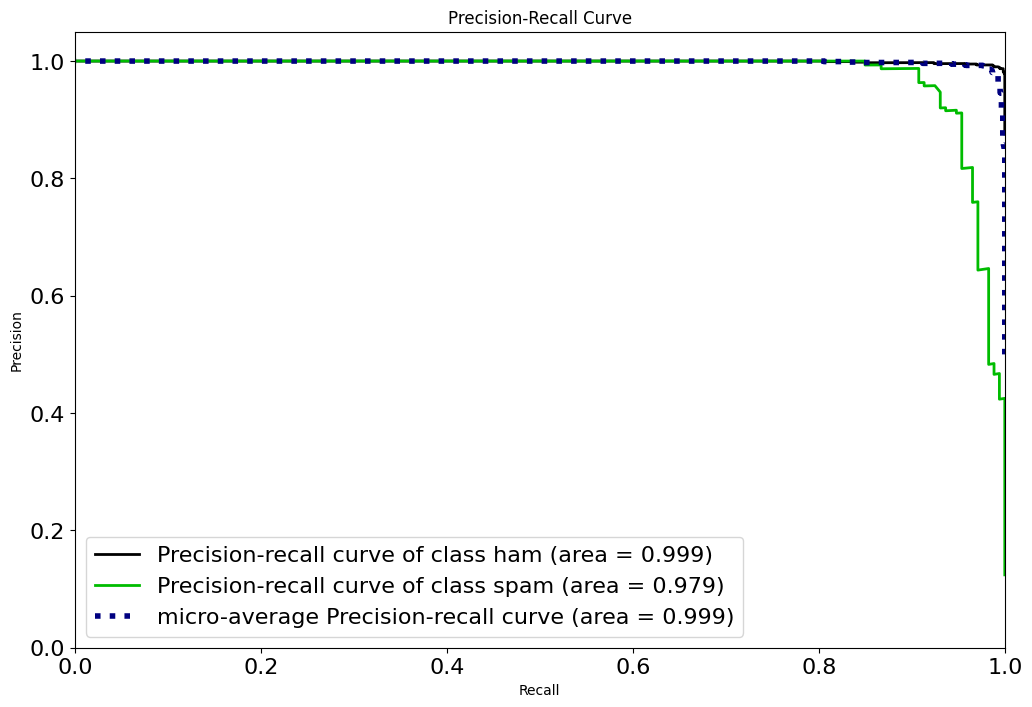

Confusion Matrix:
 [[1220    0]
 [  30  143]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       1.00      0.83      0.91       173

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 97.84637473079684
Training Score:
 99.83249581239531


In [83]:
#SVC
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, X, y)

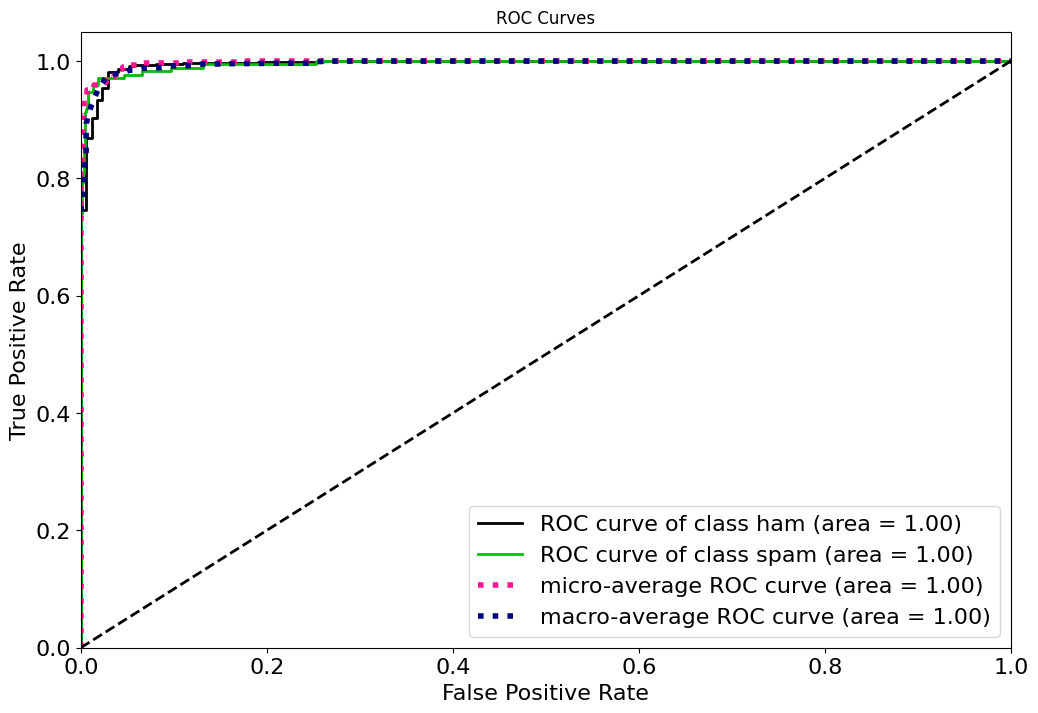

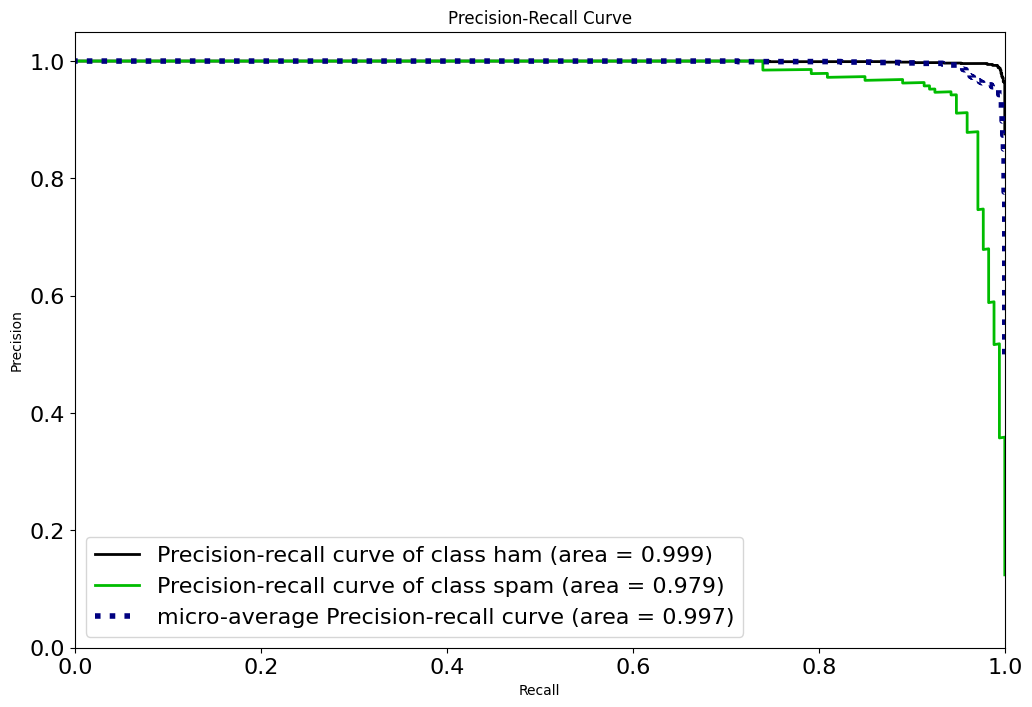

Confusion Matrix:
 [[1218    2]
 [  44  129]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.75      0.85       173

    accuracy                           0.97      1393
   macro avg       0.97      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393

Accuracy: 96.69777458722182
Training Score:
 98.82747068676717


In [84]:
#NAIVE BAYES
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, X, y)

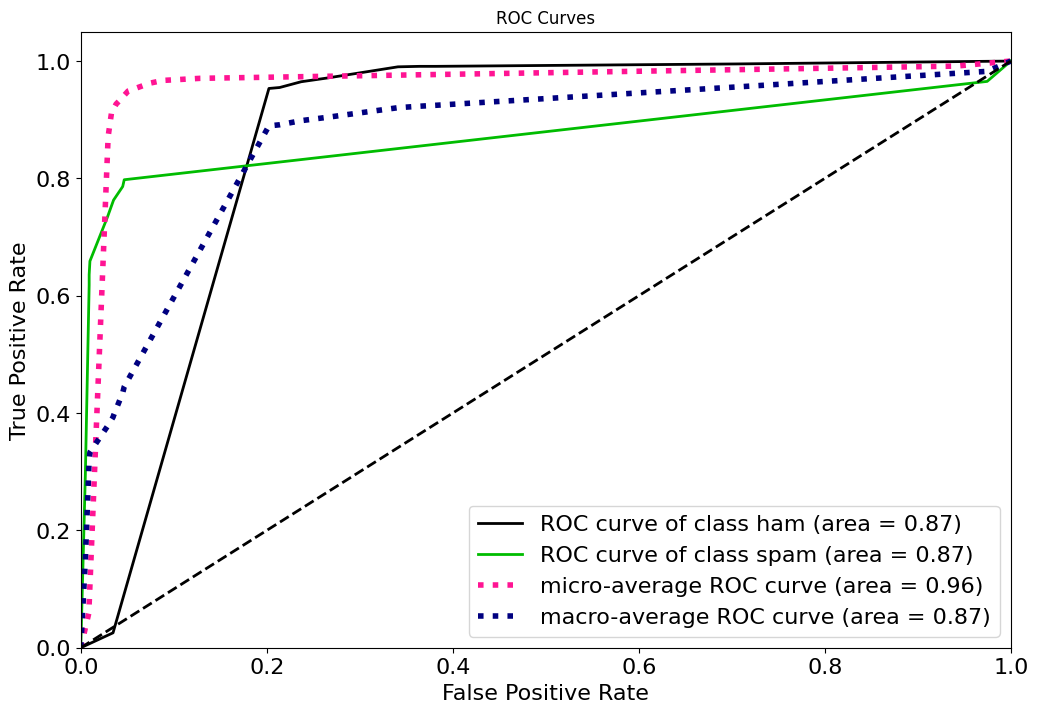

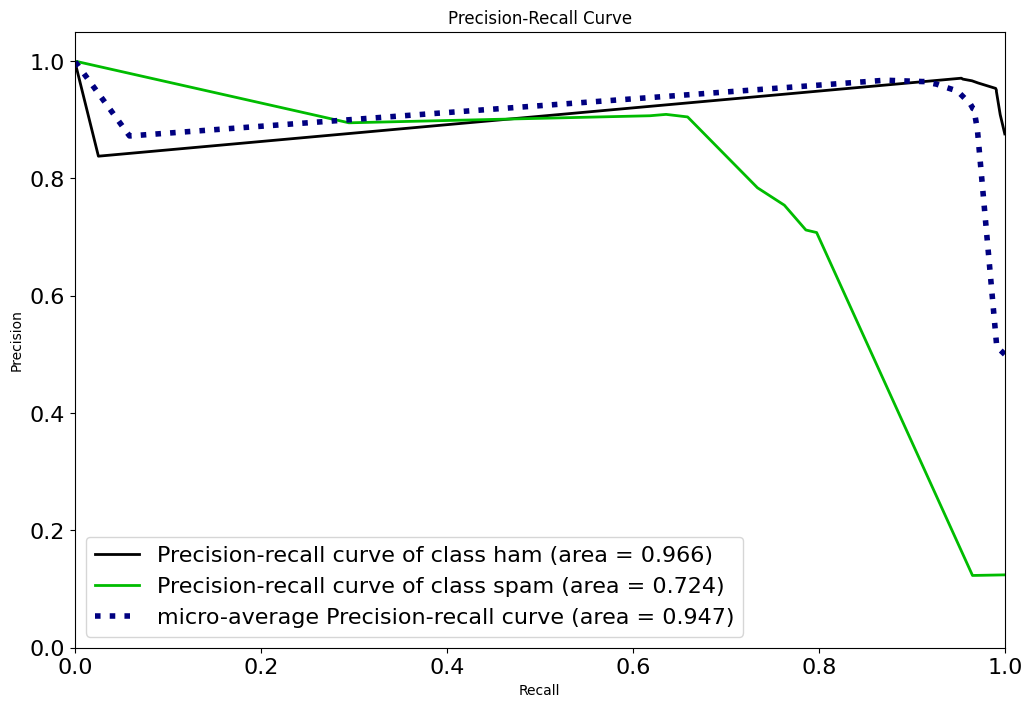

Confusion Matrix:
 [[1208   12]
 [  59  114]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1220
        spam       0.90      0.66      0.76       173

    accuracy                           0.95      1393
   macro avg       0.93      0.82      0.87      1393
weighted avg       0.95      0.95      0.95      1393

Accuracy: 94.90308686288586
Training Score:
 96.21919119406557


In [85]:
#DECISION TREE
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)

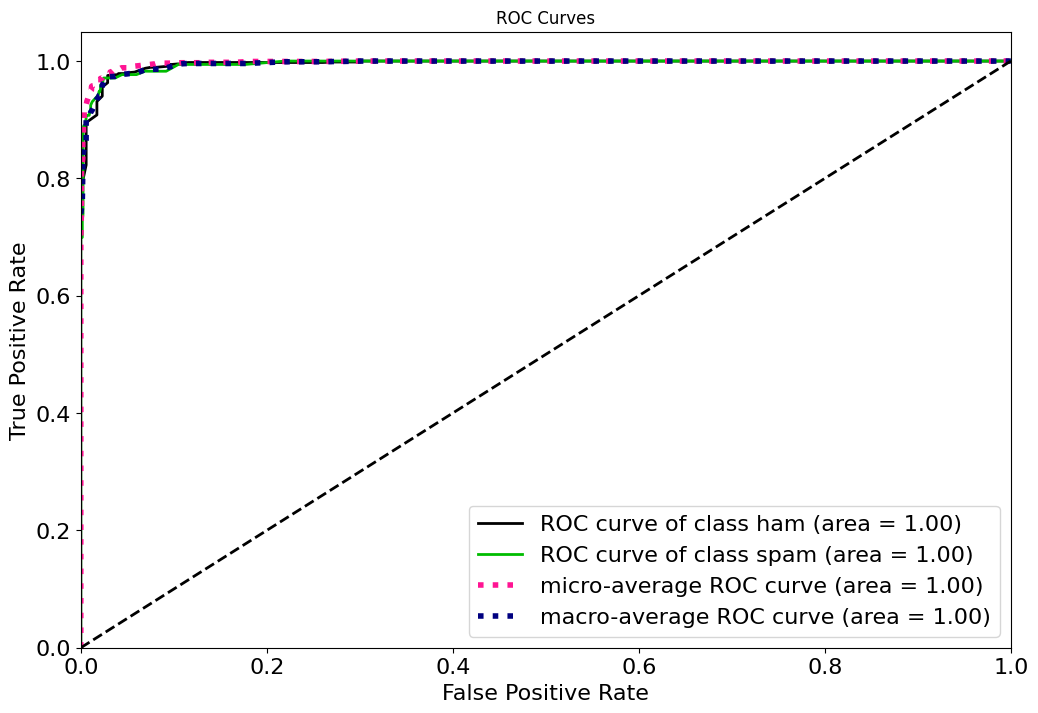

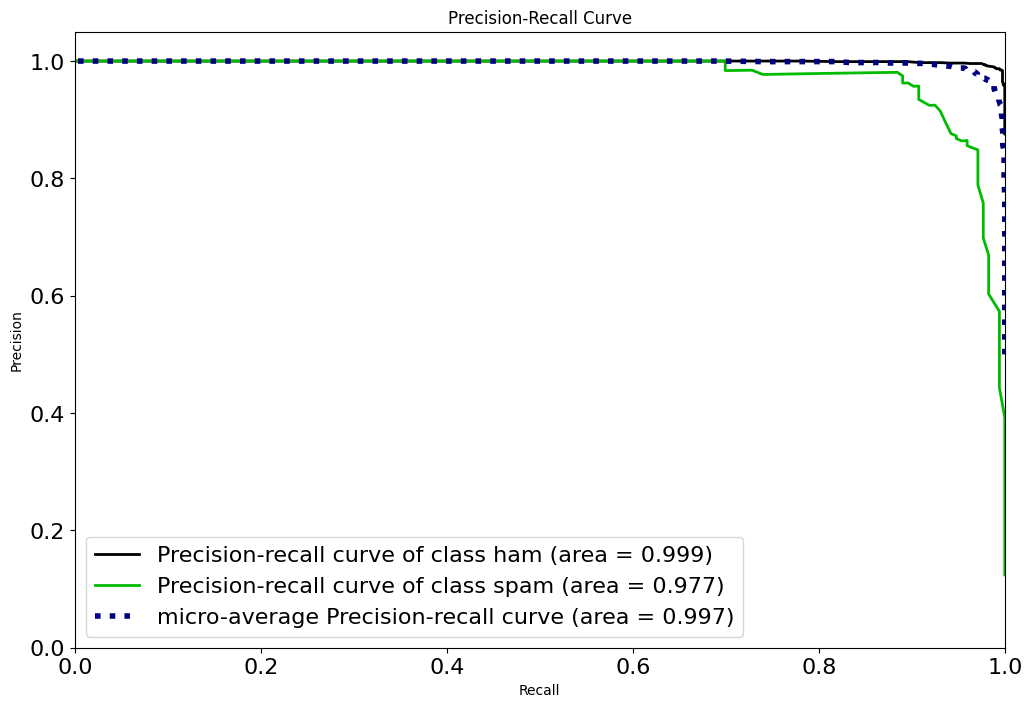

Confusion Matrix:
 [[1217    3]
 [  35  138]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.80      0.88       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.27207465900933
Training Score:
 100.0


In [89]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)

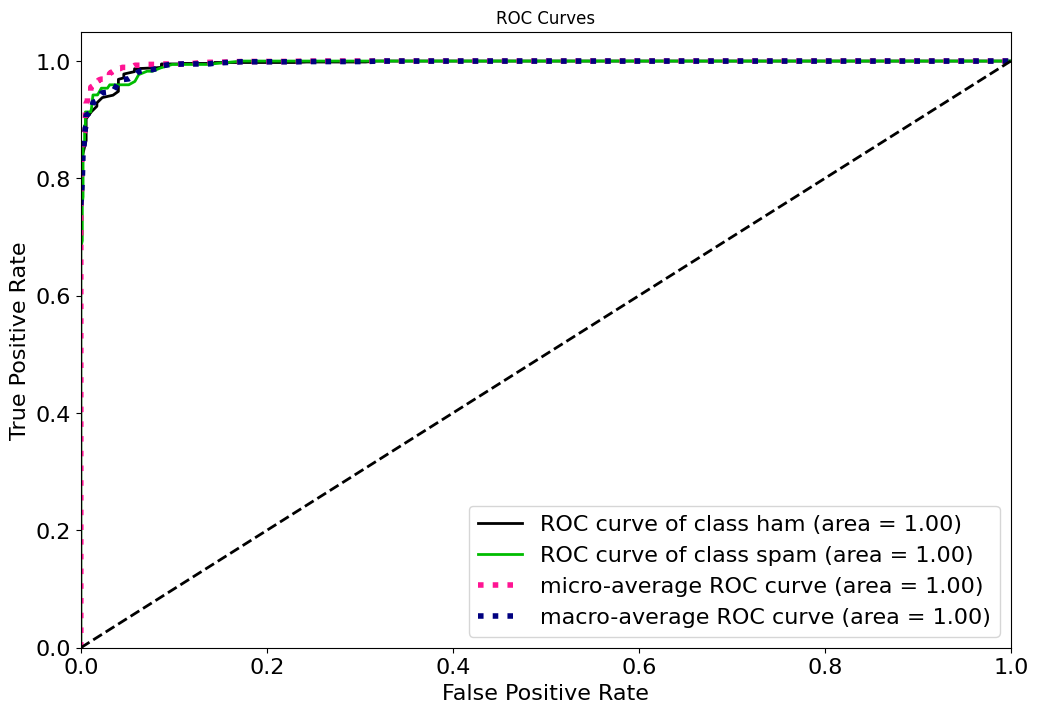

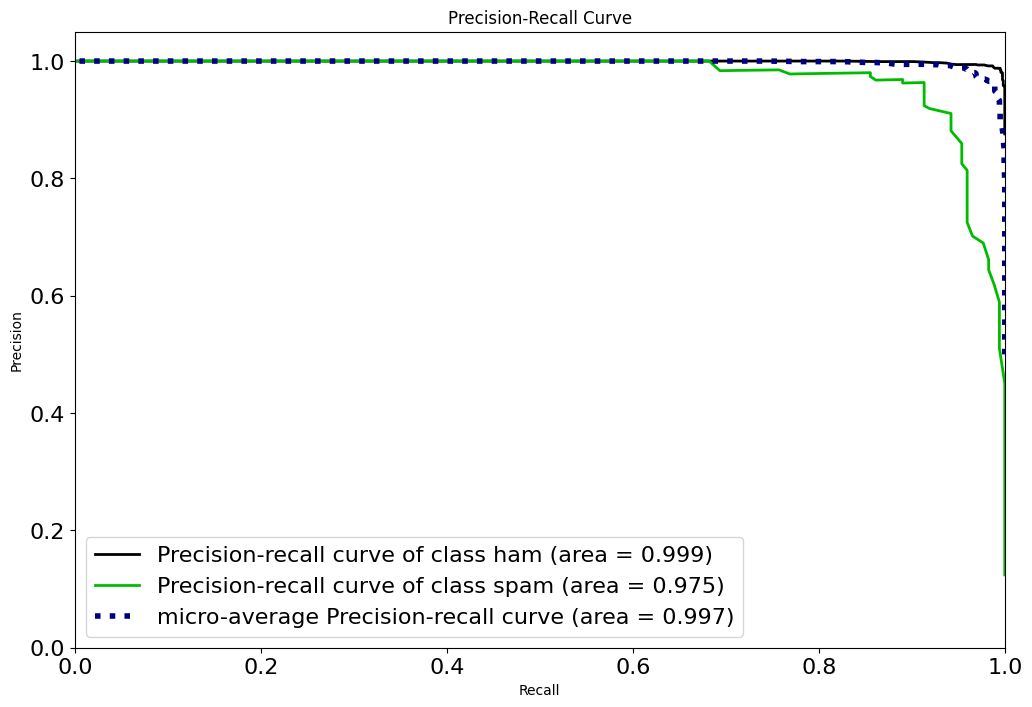

Confusion Matrix:
 [[1217    3]
 [  39  134]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.77      0.86       173

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 96.98492462311557
Training Score:
 100.0


In [90]:
#ADA BOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
Model(model, X, y)

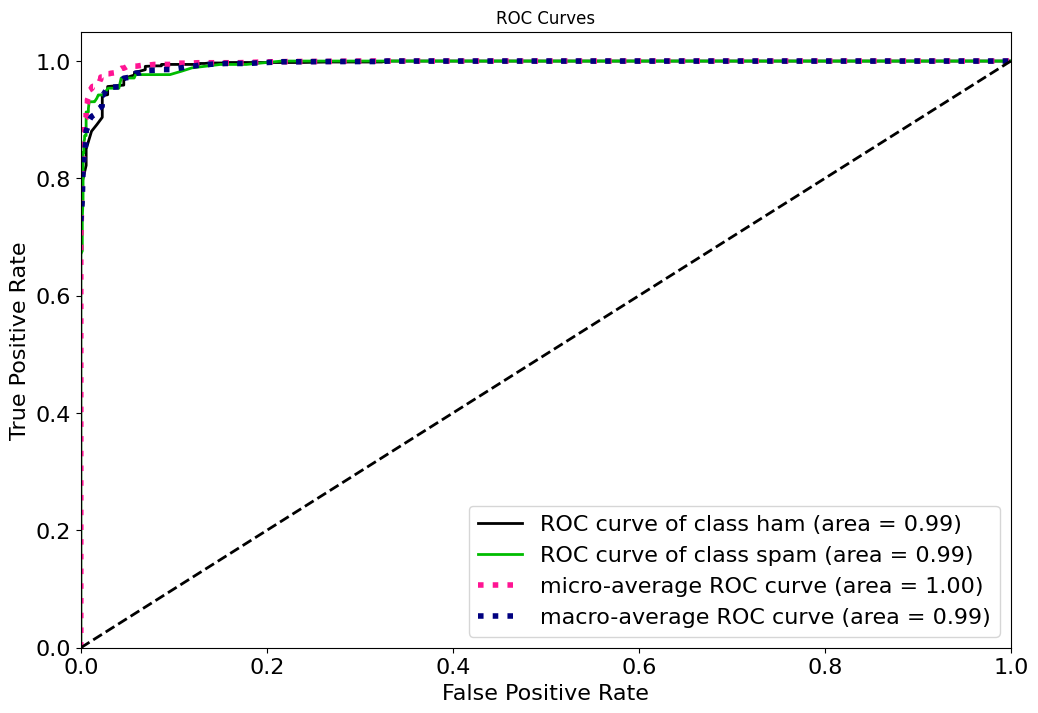

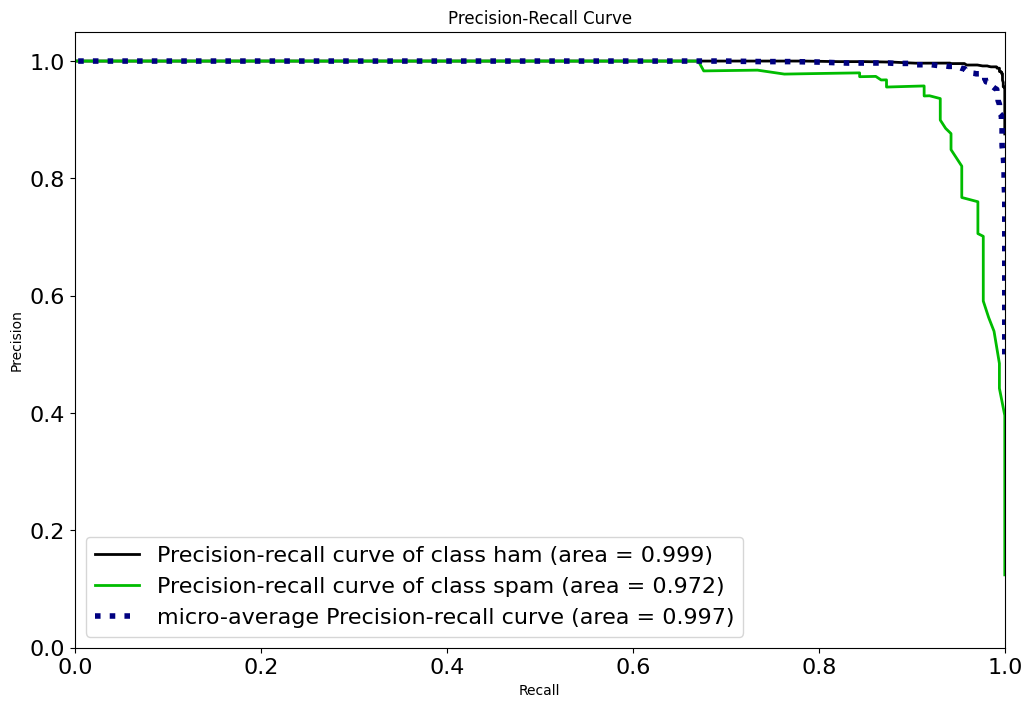

Confusion Matrix:
 [[1217    3]
 [  34  139]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.98      0.80      0.88       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.34386216798278
Training Score:
 100.0


In [91]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
Model(model, X, y)

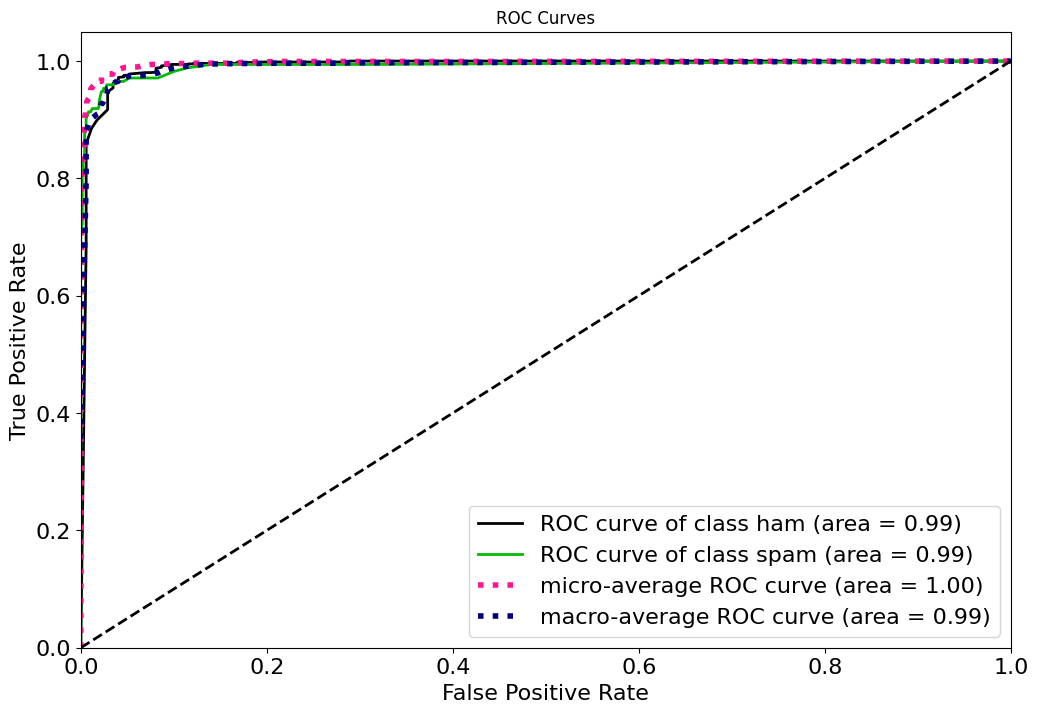

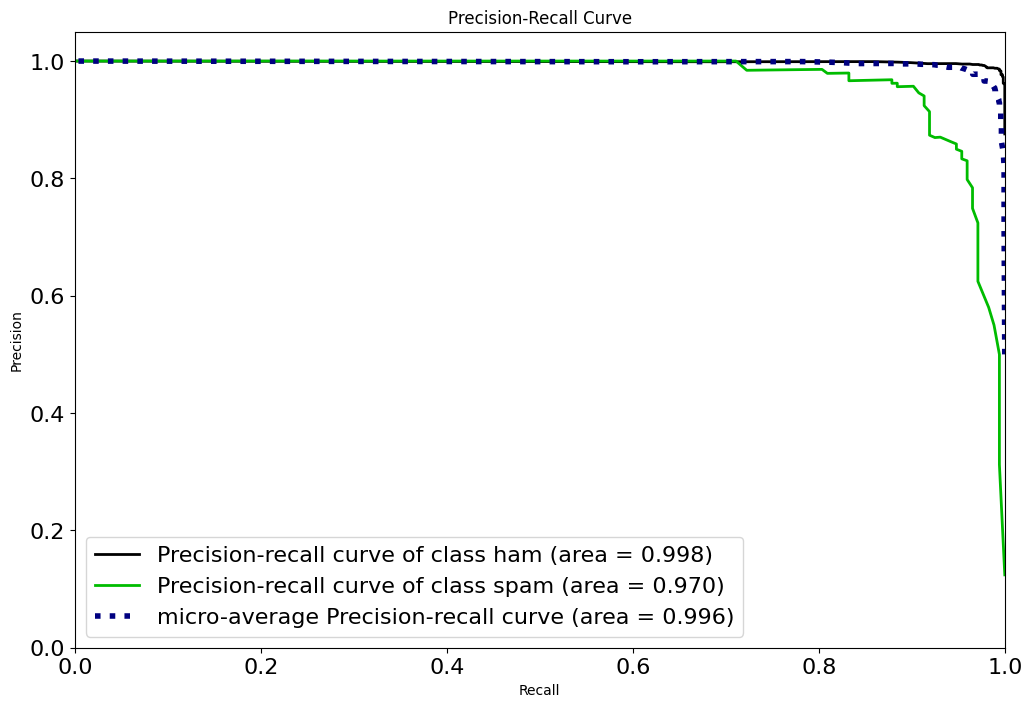

Confusion Matrix:
 [[1217    3]
 [  33  140]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.98      0.81      0.89       173

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.4156496769562
Training Score:
 100.0


In [92]:
#XGB CLASSIFIER
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
Model(model, X, y)

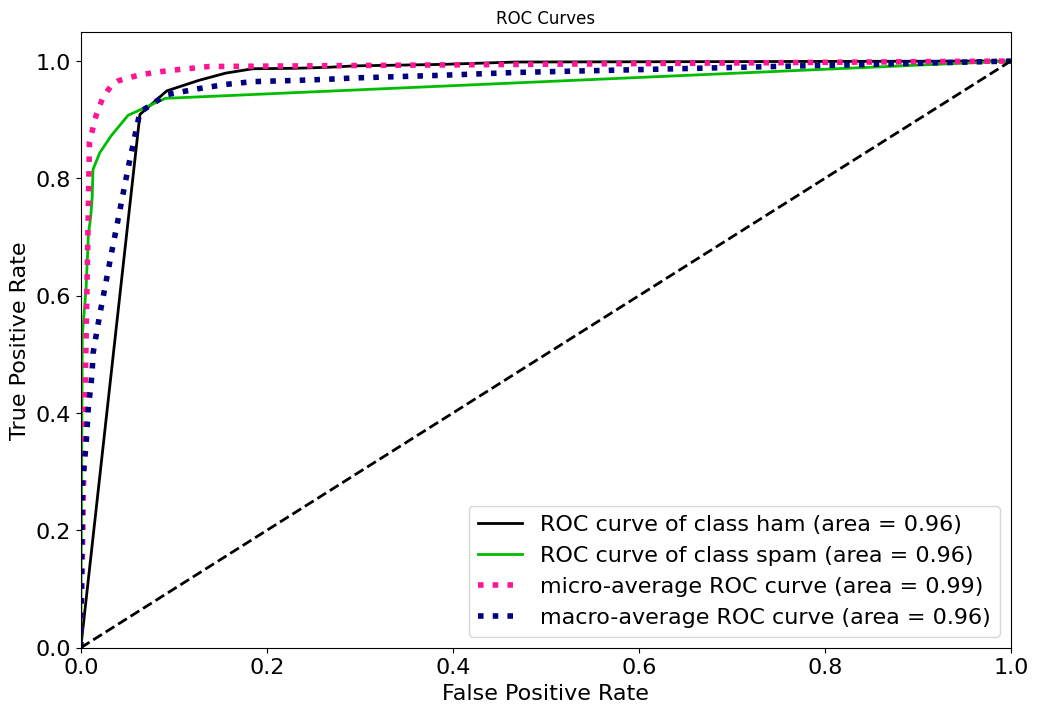

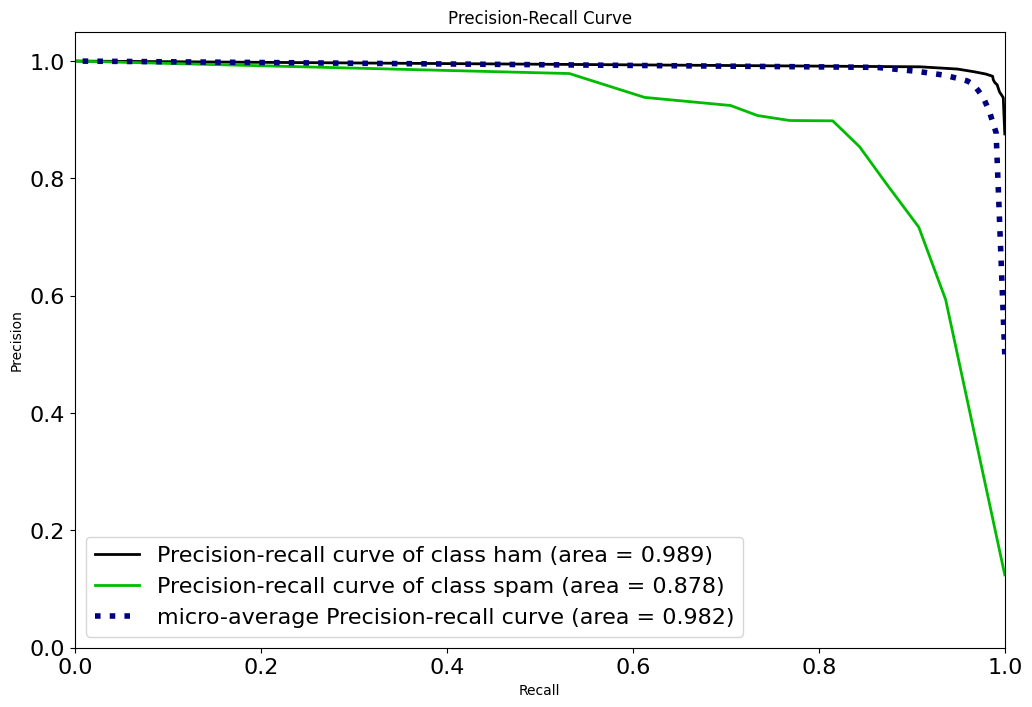

Confusion Matrix:
 [[1205   15]
 [  40  133]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1220
        spam       0.90      0.77      0.83       173

    accuracy                           0.96      1393
   macro avg       0.93      0.88      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.05168700646087
Training Score:
 99.59320411581717


In [93]:
#BAGGING CLASSIFIER
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
Model(model,X,y)

# Good Accuracy score of 98 % using Random Forest and Ada Boost